In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
mlp_data = [
    { 
        "MAE":  0.13983193039894104,
        "PCC":  0.6621181,
        "Jensen-Shannon Distance":  0.28669602,
        "weight distribution": 3.2574097632854584,
        "betweenness centrality": 0.015852706331712835,
        "eigenvector centrality": 0.005537643402635797,
        "PageRank centrality": 0.0003113277181897656,
        "core-periphery structure": 0.006145125565364997,
    },
    {
        "MAE":  0.13958963751792908,
        "PCC":  0.66005707,
        "Jensen-Shannon Distance":  0.29831532,
        "weight distribution": 3.750244885178386,
        "betweenness centrality": 0.01580055859772004,
        "eigenvector centrality": 0.0054952265697098485,
        "PageRank centrality": 0.00031082986001402076,
        "core-periphery structure": 0.006132921721750607,
    },
    {
        "MAE":  0.14341893792152405,
        "PCC":  0.6576672,
        "Jensen-Shannon Distance":  0.2908191,
        "weight distribution": 2.9793334579372495,
        "betweenness centrality": 0.0160108903515172,
        "eigenvector centrality": 0.005409642272172455,
        "PageRank centrality": 0.00030434024839357644,
        "core-periphery structure": 0.005740557757899098,
    }
]

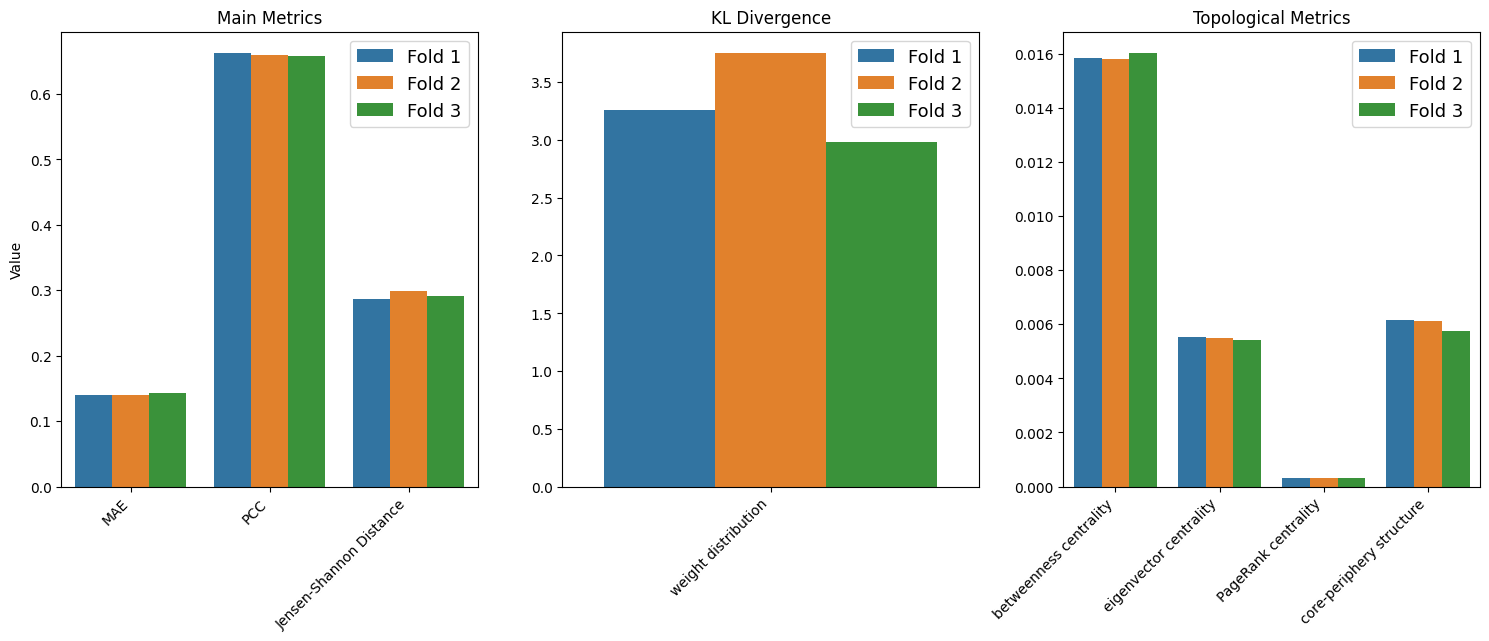

In [ ]:
# Create a DataFrame
df = pd.DataFrame(mlp_data)
df['Fold'] = ['Fold 1', 'Fold 2', 'Fold 3']

# Calculate mean values for summary
means = {}
for metric in df.columns:
    if metric != 'Fold':
        means[metric] = df[metric].mean()

# Prepare data for visualization
metrics = [col for col in df.columns if col != 'Fold']
data_melted = pd.melt(df, id_vars=['Fold'], value_vars=metrics,
                      var_name='Metric', value_name='Value')

# Group metrics by scale to make the visualization more readable
scale_groups = {
    'Main Metrics': ['MAE', 'PCC', 'Jensen-Shannon Distance'],
    'KL Divergence': ['weight distribution'],
    'Topological Metrics': [
        'betweenness centrality',
        'eigenvector centrality', 
        'PageRank centrality',
        'core-periphery structure'
    ]
}

# Create a figure with grouped bar plots by metric
plt.figure(figsize=(15, 7))

for i, (group_name, group_metrics) in enumerate(scale_groups.items()):
    plt.subplot(1, 3, i+1)
    
    # For each group, create a dataframe with just those metrics
    group_data = data_melted[data_melted['Metric'].isin(group_metrics)]
    
    # Create a grouped bar plot with Metric on x-axis and bars colored by Fold
    sns.barplot(x='Metric', y='Value', hue='Fold', data=group_data, fontsize=13)
    
    plt.title(group_name)
    plt.legend(title='', fontsize=13)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("")
    
    # Only show y-label for first subplot
    if i > 0:
        plt.ylabel('')
    
    # Tighten up the layout
    plt.tight_layout()

# plt.suptitle('MLP 3-Fold Validation Results (Grouped by Metric)', fontsize=16)
plt.subplots_adjust(top=0.9, bottom=0.25)
plt.savefig('mlp_validation_results_by_metric.png', dpi=300, bbox_inches='tight')
plt.show()

